In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import pandas as pd

# Load the CSV file from Google Drive
file_path = '/content/drive/My Drive/unique_icmpv6_ddos_attack_dataset.csv'
df = pd.read_csv(file_path)

# Display the first few rows to ensure it's loaded correctly
df.head()


,Time,Source,Destination,Protocol,Length,ICMPv6 type,ICMPv6 checksum,Class
0,766.604678,5a4e:2f08:72ea:199b:6c6b:6bc0:d84e:87d7,ff02::1,ICMPv6,1330,Destination unreachable,0xda32,Normal
1,534.972440,d8b9:8fe3:8060:1a37:3be0:49cb:dd35:6ab8,c9b8:7531:db8b:05cc:4f89:f56b:5cbb:5da3,ICMPv6,1122,Echo request,0xf8a2,Normal
2,1582.632842,7956:f09a:b64d:9a8d:48df:d9ca:516c:e694,ff02::1,ICMPv6,162,Destination unreachable,0xf84b,Normal
3,1454.110255,89ef:f882:81ce:4cab:4a5a:0cd9:7c46:21de,ff02::2,ICMPv6,1542,Destination unreachable,0xb0ed,Attack
4,191.676793,5d02:3bc0:56f4:ae08:846d:03ba:93ae:4c19,7849:bef9:ff69:c806:91ff:c520:1481:e762,ICMPv6,1015,Neighbour advertisement,0xe66b,Normal


In [20]:
df.tail()

,Time,Source,Destination,Protocol,Length,ICMPv6 type,ICMPv6 checksum,Class
749995,732.930010,a8f1:7f0e:d5d2:bd42:68a5:df7f:f5e5:8d75,ff02::2,ICMPv6,1842,Time exceeded,0x222e,Attack
749996,340.055271,767b:9e6e:ca88:6c03:8dda:4cfb:b3d8:79ef,21f8:80d7:c3ed:1839:9a93:a849:1d34:c5b5,ICMPv6,414,Router solicitation,0x8bec,Normal
749997,1722.450439,742e:8090:8c43:4c4e:2f31:7535:ce2e:d7d2,84bd:bb60:0f94:cf08:6c05:9ae9:e219:bc76,ICMPv6,323,Neighbour solicitation,0x0cce,Normal
749998,869.883078,ce1c:5ab0:118d:5f39:afea:0356:17f2:17d8,b73a:be02:5ad3:c80c:1223:bd5c:c0e5:811a,ICMPv6,535,Router advertisement,0x3ddc,Normal
749999,1645.465339,ce27:435d:0ee6:cde5:75b9:c92d:0eb2:1672,5301:1605:cd26:2922:ba80:d2b0:0cae:56b1,ICMPv6,915,Router advertisement,0x6fee,Normal


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Time             750000 non-null  float64
 1   Source           750000 non-null  object 
 2   Destination      750000 non-null  object 
 3   Protocol         750000 non-null  object 
 4   Length           750000 non-null  int64  
 5   ICMPv6 type      750000 non-null  object 
 6   ICMPv6 checksum  750000 non-null  object 
 7   Class            750000 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 45.8+ MB


In [22]:
df.describe()

,Time,Length
count,750000.000000,750000.000000
mean,1000.467679,1157.796363
std,577.752452,539.694837
min,0.007256,40.000000
25%,499.506262,725.000000
50%,1000.912392,1280.000000
75%,1500.055323,1572.000000
max,1999.999878,2000.000000


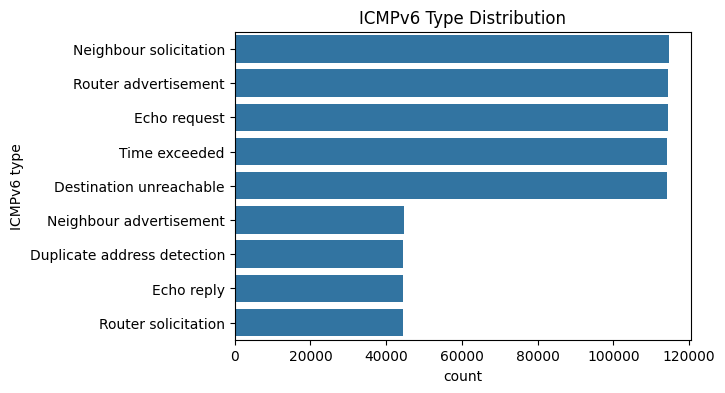

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.figure(figsize=(20, 4))

plt.subplot(1, 3, 2)
sns.countplot(y=df['ICMPv6 type'], order=df['ICMPv6 type'].value_counts().index)
plt.title('ICMPv6 Type Distribution')

plt.show()

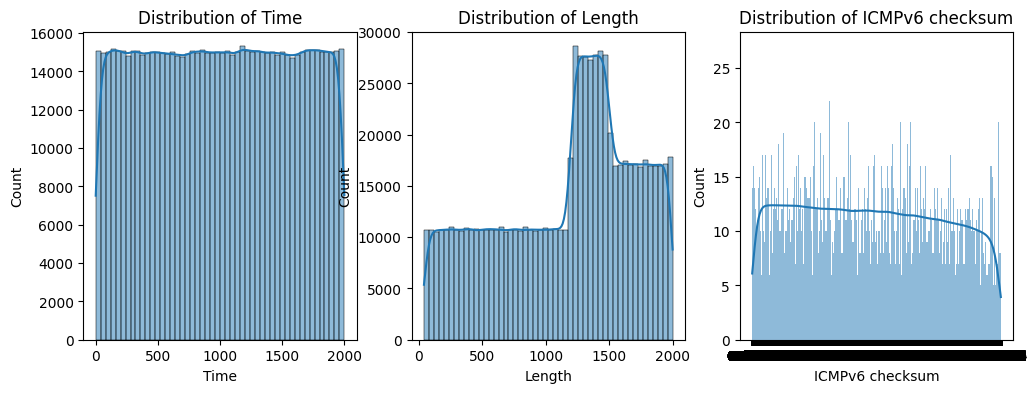

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = ['Time', 'Length', 'ICMPv6 checksum']

plt.figure(figsize=(12, 4))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
plt.show()


/tmp/ipython-input-11-581237440.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Class', palette={'Normal': 'cyan', 'Attack': 'red' })  # Update the column name accordingly


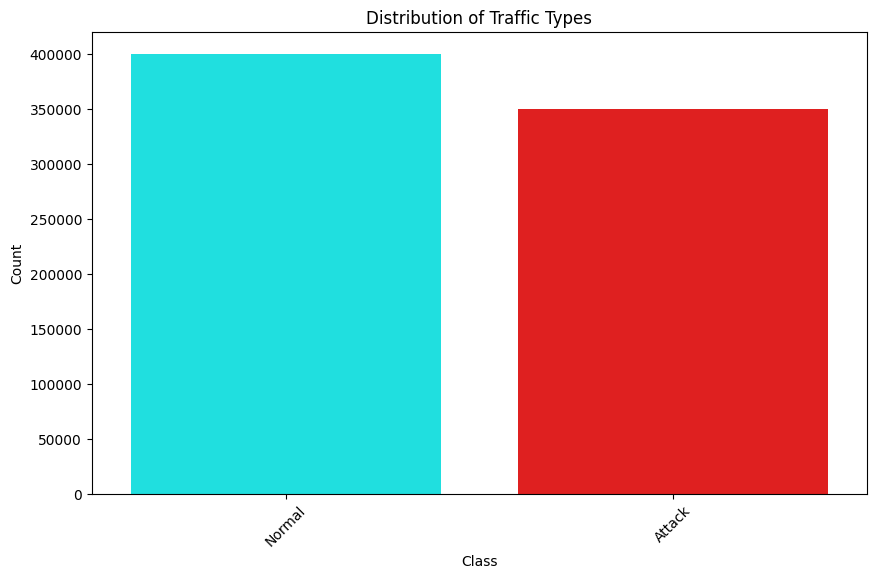

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Plotting the distribution of traffic types
plt.figure(figsize=(10, 6))

# Set custom colors for the 'Normal' and 'Attack' classes
sns.countplot(data=df, x='Class', palette={'Normal': 'cyan', 'Attack': 'red' })  # Update the column name accordingly

plt.title('Distribution of Traffic Types')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Save the plot to a file
plt.savefig('traffic_type_distribution.png', format='png')  # Save as PNG (you can change the format to .jpg, .pdf, etc.)

# Show the plot
plt.show()


In [4]:
import pandas as pd
import re

# Handle missing values
df = df.dropna()

# Convert Time to numeric
df['Time'] = pd.to_numeric(df['Time'], errors='coerce').fillna(0)

# Convert Length to numeric
df['Length'] = pd.to_numeric(df['Length'], errors='coerce').fillna(0)

# Convert ICMPv6 checksum from hex to decimal
df['ICMPv6 checksum'] = df['ICMPv6 checksum'].apply(
    lambda x: int(x, 16) if isinstance(x, str) and re.match(r'^0x[0-9a-fA-F]+$', x) else 0
)

# Save preprocessed data
df.to_csv('preprocessed_data.csv', index=False)
print("Preprocessing complete. Saved to 'preprocessed_data.csv'.")

Preprocessing complete. Saved to 'preprocessed_data.csv'.


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Time             750000 non-null  float64
 1   Source           750000 non-null  object 
 2   Destination      750000 non-null  object 
 3   Protocol         750000 non-null  object 
 4   Length           750000 non-null  int64  
 5   ICMPv6 type      750000 non-null  object 
 6   ICMPv6 checksum  750000 non-null  int64  
 7   Class            750000 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 45.8+ MB


In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Function to convert IPv6 address to numerical features
def ipv6_to_numeric(ip):
    try:
        segments = ip.split(':')
        numeric = [int(seg, 16) if seg else 0 for seg in segments]
        while len(numeric) < 8:
            numeric.append(0)
        return numeric
    except:
        return [0] * 8

# Load preprocessed data
df = pd.read_csv('preprocessed_data.csv')

# Convert IPv6 addresses to numerical features
df['Source_numeric'] = df['Source'].apply(ipv6_to_numeric)
df['Destination_numeric'] = df['Destination'].apply(ipv6_to_numeric)

# Expand IPv6 segments into separate columns
for i in range(8):
    df[f'Source_seg_{i}'] = df['Source_numeric'].apply(lambda x: x[i])
    df[f'Destination_seg_{i}'] = df['Destination_numeric'].apply(lambda x: x[i])

# Drop original and temporary IP columns
df = df.drop(['Source', 'Destination', 'Source_numeric', 'Destination_numeric'], axis=1)

# Encode categorical variables
le_protocol = LabelEncoder()
df['Protocol'] = le_protocol.fit_transform(df['Protocol'])

le_icmp_type = LabelEncoder()
df['ICMPv6 type'] = le_icmp_type.fit_transform(df['ICMPv6 type'])

le_class = LabelEncoder()
df['Class'] = le_class.fit_transform(df['Class'])  # Normal=0, Attack=1

# Save encoders for later use
import joblib
joblib.dump(le_protocol, 'le_protocol.pkl')
joblib.dump(le_icmp_type, 'le_icmp_type.pkl')
joblib.dump(le_class, 'le_class.pkl')

# Save feature-engineered data
df.to_csv('engineered_data.csv', index=False)
print("Feature engineering complete. Saved to 'engineered_data.csv'.")

Feature engineering complete. Saved to 'engineered_data.csv'.


In [6]:
df.describe()

,Time,Protocol,Length,ICMPv6 type,ICMPv6 checksum,Class,Source_seg_0,Destination_seg_0,Source_seg_1,Destination_seg_1,...,Source_seg_3,Destination_seg_3,Source_seg_4,Destination_seg_4,Source_seg_5,Destination_seg_5,Source_seg_6,Destination_seg_6,Source_seg_7,Destination_seg_7
count,750000.000000,750000.0,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,...,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,1000.467679,0.0,1157.796363,4.187489,32752.591115,0.533333,32802.591479,45762.472369,32793.522708,19647.409756,...,32752.958923,19658.595432,32752.788995,19629.680743,32748.477957,19675.467465,32786.918327,19666.114937,32752.025148,19662.293563
std,577.752452,0.0,539.694837,2.656349,18919.748630,0.498888,18913.572643,21668.449878,18913.176027,21732.126879,...,18927.635355,21746.961796,18931.142099,21712.452454,18913.254489,21747.551465,18920.556981,21730.302380,18928.118665,21742.750392
min,0.007256,0.0,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,499.506262,0.0,725.000000,2.000000,16365.000000,0.000000,16417.000000,27281.000000,16419.000000,0.000000,...,16340.000000,0.000000,16357.000000,0.000000,16379.000000,0.000000,16392.750000,0.000000,16373.750000,0.000000
50%,1000.912392,0.0,1280.000000,5.000000,32729.000000,1.000000,32857.000000,54647.000000,32795.000000,10892.000000,...,32748.000000,10877.000000,32751.000000,10869.000000,32751.000000,10934.000000,32787.000000,10988.000000,32734.000000,10908.000000
75%,1500.055323,0.0,1572.000000,6.000000,49119.000000,1.000000,49172.250000,65282.000000,49184.000000,38187.250000,...,49141.250000,38282.000000,49150.000000,38171.250000,49114.000000,38260.000000,49127.000000,38254.000000,49164.000000,38275.000000
max,1999.999878,0.0,2000.000000,8.000000,65535.000000,1.000000,65535.000000,65535.000000,65535.000000,65535.000000,...,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Time               750000 non-null  float64
 1   Protocol           750000 non-null  int64  
 2   Length             750000 non-null  int64  
 3   ICMPv6 type        750000 non-null  int64  
 4   ICMPv6 checksum    750000 non-null  int64  
 5   Class              750000 non-null  int64  
 6   Source_seg_0       750000 non-null  int64  
 7   Destination_seg_0  750000 non-null  int64  
 8   Source_seg_1       750000 non-null  int64  
 9   Destination_seg_1  750000 non-null  int64  
 10  Source_seg_2       750000 non-null  int64  
 11  Destination_seg_2  750000 non-null  int64  
 12  Source_seg_3       750000 non-null  int64  
 13  Destination_seg_3  750000 non-null  int64  
 14  Source_seg_4       750000 non-null  int64  
 15  Destination_seg_4  750000 non-null  int64  
 16  So

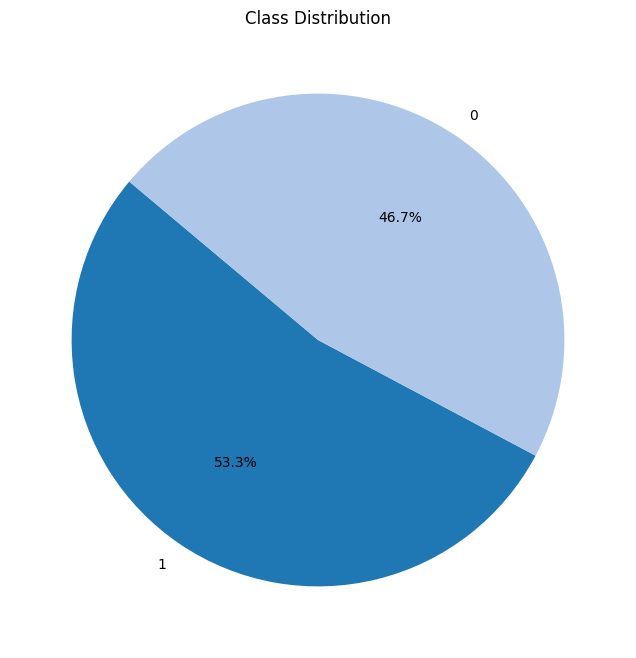

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the samples in each class before SMOTE
class_counts_before = df['Class'].value_counts()

# Generate the pie chart including Normal traffic
plt.figure(figsize=(10, 8))
plt.pie(class_counts_before.values, labels=class_counts_before.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("tab20", len(class_counts_before)))
plt.title("Class Distribution")

# Save the pie chart as an image
plt.savefig("class_distribution_pie_chart.png")

# Show the pie chart
plt.show()


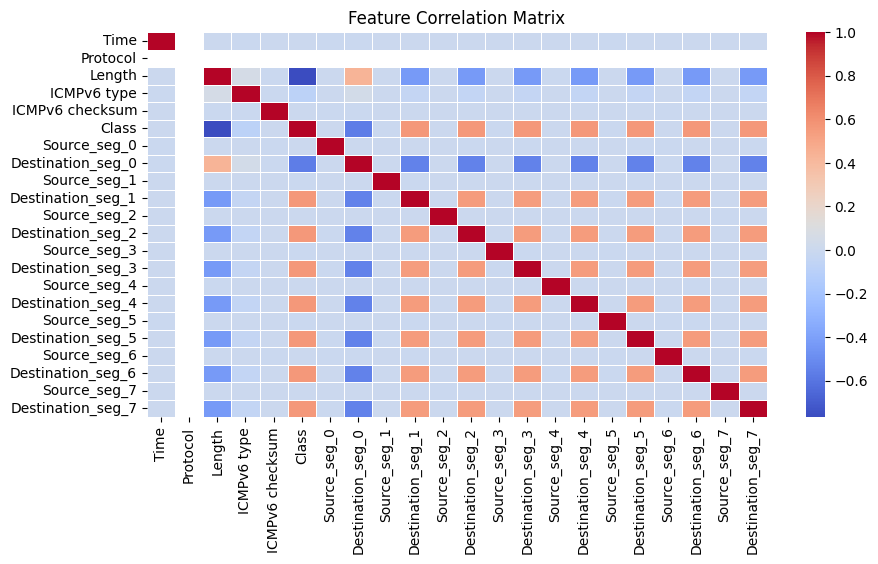

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix
correlation_matrix = df.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load feature-engineered data
df = pd.read_csv('engineered_data.csv')

# Define features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Scale numerical features
scaler = StandardScaler()
numerical_features = ['Time', 'Length', 'ICMPv6 checksum'] + \
                     [f'Source_seg_{i}' for i in range(8)] + \
                     [f'Destination_seg_{i}' for i in range(8)]
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Split dataset into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Save scaled and split datasets
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

# Save scaler
import joblib
joblib.dump(scaler, 'scaler.pkl')

print("Dataset splitting complete. Saved train/test sets and scaler.")

Dataset splitting complete. Saved train/test sets and scaler.


In [9]:
df.head()

,Time,Protocol,Length,ICMPv6 type,ICMPv6 checksum,Class,Source_seg_0,Destination_seg_0,Source_seg_1,Destination_seg_1,...,Source_seg_3,Destination_seg_3,Source_seg_4,Destination_seg_4,Source_seg_5,Destination_seg_5,Source_seg_6,Destination_seg_6,Source_seg_7,Destination_seg_7
0,766.604678,0,1330,0,55858,1,23118,65282,12040,0,...,6555,0,27755,0,27584,0,55374,0,34775,0
1,534.972440,0,1122,3,63650,1,55481,51640,36835,30001,...,6711,1484,15328,20361,18891,62827,56629,23739,27320,23971
2,1582.632842,0,162,0,63563,1,31062,65282,61594,0,...,39565,0,18655,0,55754,0,20844,0,59028,0
3,1454.110255,0,1542,0,45293,0,35311,65282,63618,0,...,19627,0,19034,0,3289,0,31814,0,8670,0
4,191.676793,0,1015,4,58987,1,23810,30793,15296,48889,...,44552,51206,33901,37375,954,50464,37806,5249,19481,59234


In [10]:
df.tail()

,Time,Protocol,Length,ICMPv6 type,ICMPv6 checksum,Class,Source_seg_0,Destination_seg_0,Source_seg_1,Destination_seg_1,...,Source_seg_3,Destination_seg_3,Source_seg_4,Destination_seg_4,Source_seg_5,Destination_seg_5,Source_seg_6,Destination_seg_6,Source_seg_7,Destination_seg_7
749995,732.930010,0,1842,8,8750,0,43249,65282,32526,0,...,48450,0,26789,0,57215,0,62949,0,36213,0
749996,340.055271,0,414,7,35820,1,30331,8696,40558,32983,...,27651,6201,36314,39571,19707,43081,46040,7476,31215,50613
749997,1722.450439,0,323,5,3278,1,29742,33981,32912,47968,...,19534,53000,12081,27653,30005,39657,52782,57881,55250,48246
749998,869.883078,0,535,6,15836,1,52764,46906,23216,48642,...,24377,51212,45034,4643,854,48476,6130,49381,6104,33050
749999,1645.465339,0,915,6,28654,1,52775,21249,17245,5637,...,52709,10530,30137,47744,51501,53936,3762,3246,5746,22193


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Time               750000 non-null  float64
 1   Protocol           750000 non-null  int64  
 2   Length             750000 non-null  int64  
 3   ICMPv6 type        750000 non-null  int64  
 4   ICMPv6 checksum    750000 non-null  int64  
 5   Class              750000 non-null  int64  
 6   Source_seg_0       750000 non-null  int64  
 7   Destination_seg_0  750000 non-null  int64  
 8   Source_seg_1       750000 non-null  int64  
 9   Destination_seg_1  750000 non-null  int64  
 10  Source_seg_2       750000 non-null  int64  
 11  Destination_seg_2  750000 non-null  int64  
 12  Source_seg_3       750000 non-null  int64  
 13  Destination_seg_3  750000 non-null  int64  
 14  Source_seg_4       750000 non-null  int64  
 15  Destination_seg_4  750000 non-null  int64  
 16  So

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib

# Load train and test sets
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

# Train RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train.values.ravel())

# Evaluate model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Normal', 'Attack']))

# Save model
joblib.dump(model, 'icmpv6_classifier.pkl')
print("Model training complete. Saved model to 'icmpv6_classifier.pkl'.")

Accuracy: 0.9634533333333334

Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      0.92      0.96     70000
      Attack       0.94      1.00      0.97     80000

    accuracy                           0.96    150000
   macro avg       0.97      0.96      0.96    150000
weighted avg       0.97      0.96      0.96    150000

Model training complete. Saved model to 'icmpv6_classifier.pkl'.


In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import joblib

# Load train and test sets
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

# Train Logistic Regression Classifier
model = LogisticRegression(
    max_iter=1000,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train.values.ravel())

# Evaluate model
y_pred = model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Normal', 'Attack']))

# Save model
joblib.dump(model, 'logistic_regression_classifier.pkl')
print("Logistic Regression model training complete. Saved model to 'logistic_regression_classifier.pkl'.")

Logistic Regression Accuracy: 0.9417266666666667

Logistic Regression Classification Report:
              precision    recall  f1-score   support

      Normal       0.94      0.94      0.94     70000
      Attack       0.94      0.95      0.95     80000

    accuracy                           0.94    150000
   macro avg       0.94      0.94      0.94    150000
weighted avg       0.94      0.94      0.94    150000

Logistic Regression model training complete. Saved model to 'logistic_regression_classifier.pkl'.


In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib

# Load train and test sets
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

# Train Gradient Boosting Classifier
model = GradientBoostingClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42
)
model.fit(X_train, y_train.values.ravel())

# Evaluate model
y_pred = model.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred))
print("\nGradient Boosting Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Normal', 'Attack']))

# Save model
joblib.dump(model, 'gradient_boosting_classifier.pkl')
print("Gradient Boosting model training complete. Saved model to 'gradient_boosting_classifier.pkl'.")

Gradient Boosting Accuracy: 0.96374

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      0.92      0.96     70000
      Attack       0.94      1.00      0.97     80000

    accuracy                           0.96    150000
   macro avg       0.97      0.96      0.96    150000
weighted avg       0.97      0.96      0.96    150000

Gradient Boosting model training complete. Saved model to 'gradient_boosting_classifier.pkl'.


In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib

# Load train and test sets
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

# Train KNN Classifier
model = KNeighborsClassifier(
    n_neighbors=5,
    weights='distance',
    n_jobs=-1
)
model.fit(X_train, y_train.values.ravel())

# Evaluate model
y_pred = model.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred))
print("\nKNN Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Normal', 'Attack']))

# Save model
joblib.dump(model, 'knn_classifier.pkl')
print("KNN model training complete. Saved model to 'knn_classifier.pkl'.")

KNN Accuracy: 0.9149866666666666

KNN Classification Report:
              precision    recall  f1-score   support

      Normal       0.94      0.88      0.91     70000
      Attack       0.90      0.95      0.92     80000

    accuracy                           0.91    150000
   macro avg       0.92      0.91      0.91    150000
weighted avg       0.92      0.91      0.91    150000

KNN model training complete. Saved model to 'icmpv6_knn_classifier.pkl'.


In [32]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import joblib

# Load train and test sets
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

# Train SVM Classifier
model = SVC(
    kernel='linear',
    C=1.0,
    random_state=42
)
model.fit(X_train, y_train.values.ravel())

# Evaluate model
y_pred = model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred))
print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Normal', 'Attack']))

# Save model
joblib.dump(model, 'svm_classifier.pkl')
print("SVM model training complete. Saved model to 'svm_classifier.pkl'.")

SVM Accuracy: 0.9442933333333333

SVM Classification Report:
              precision    recall  f1-score   support

      Normal       0.95      0.93      0.94     70000
      Attack       0.94      0.96      0.95     80000

    accuracy                           0.94    150000
   macro avg       0.95      0.94      0.94    150000
weighted avg       0.94      0.94      0.94    150000

SVM model training complete. Saved model to 'svm_classifier.pkl'.


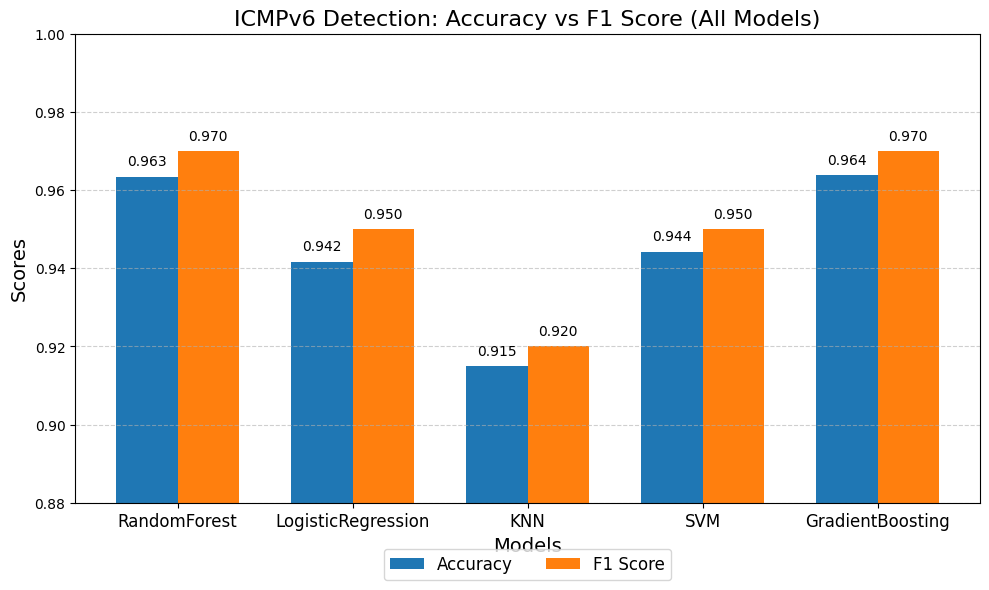

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Define the model names and their metrics
models = ['RandomForest', 'LogisticRegression', 'KNN', 'SVM', 'GradientBoosting']
accuracies = [0.96345, 0.94173, 0.91499, 0.94429, 0.96374]
f1_scores = [0.97, 0.95, 0.92, 0.95, 0.97]  # Based on your reports

# Set bar width and positions
bar_width = 0.35
index = np.arange(len(models))
colors = ['#1f77b4', '#ff7f0e']

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Accuracy bars
acc_bars = ax.bar(index, accuracies, bar_width, color=colors[0], label='Accuracy')
# F1 Score bars
f1_bars = ax.bar(index + bar_width, f1_scores, bar_width, color=colors[1], label='F1 Score')

# Labeling and formatting
ax.set_xlabel('Models', fontsize=14)
ax.set_ylabel('Scores', fontsize=14)
ax.set_title('ICMPv6 Detection: Accuracy vs F1 Score (All Models)', fontsize=16)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models, fontsize=12)
ax.set_ylim(0.88, 1.0)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08), ncol=2, fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.6)

# Annotate bars
for bars in [acc_bars, f1_bars]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 0.002,
                f"{height:.3f}", ha='center', va='bottom', fontsize=10)

# Save the chart
plt.tight_layout()
plt.savefig("icmpv6_all_models_comparison.png")
plt.show()